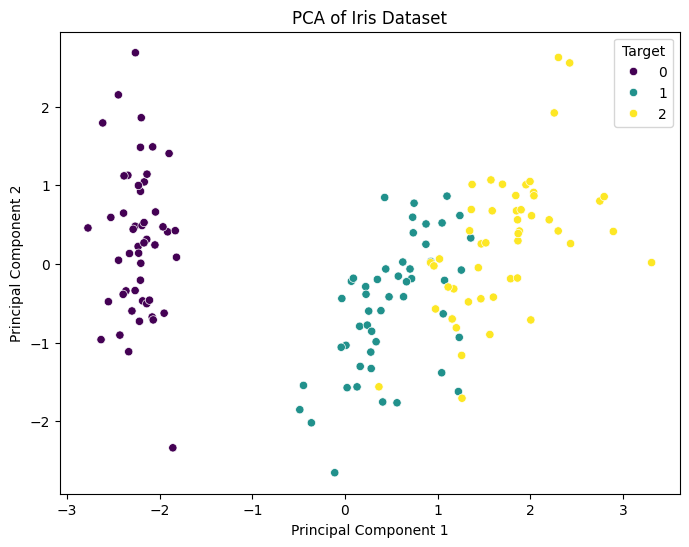

✅ PCA results saved to iris_pca.csv!


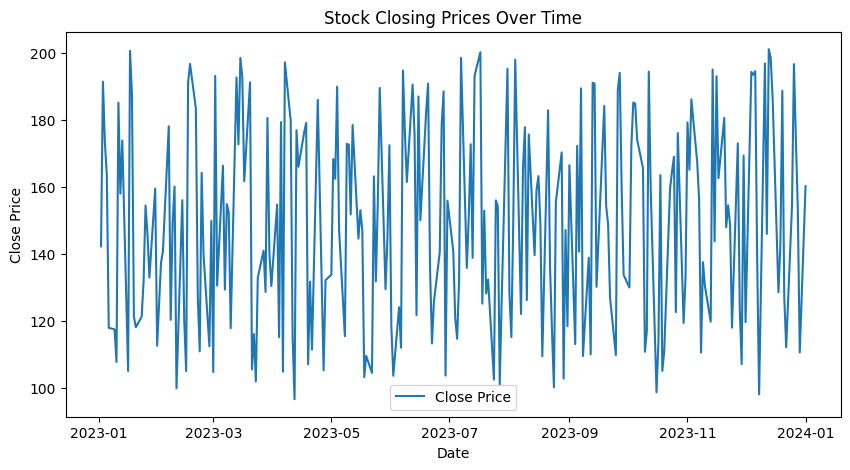

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


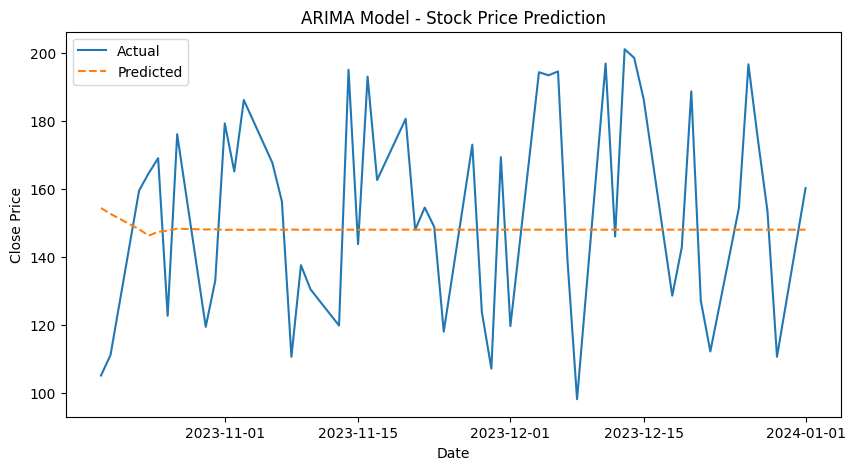

📊 Model Evaluation:
✅ MAE: 26.73
✅ RMSE: 30.91
✅ MAPE: 17.96%
✅ Stock predictions saved to stock_predictions.csv!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# === PART 1: PCA - DIMENSIONALITY REDUCTION ON IRIS DATASET ===
# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Standardize the dataset
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])  # Exclude target column

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
pca_df['target'] = iris_df['target']

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['target'], palette='viridis', data=pca_df)
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target")
plt.show()

# Save PCA results
pca_df.to_csv("iris_pca.csv", index=False)
print("✅ PCA results saved to iris_pca.csv!")

# === PART 2: STOCK PRICE PREDICTION USING ARIMA ===
# Load stock prices dataset (Replace this with real stock data if available)
date_range = pd.date_range(start="2023-01-01", end="2024-01-01", freq='B')  # Business days
np.random.seed(42)
open_prices = np.random.uniform(low=100, high=200, size=len(date_range))
close_prices = open_prices + np.random.uniform(low=-5, high=5, size=len(date_range))
volume = np.random.randint(100000, 1000000, size=len(date_range))

# Create DataFrame
stock_df = pd.DataFrame({
    'Date': date_range,
    'Open': open_prices,
    'Close': close_prices,
    'Volume': volume
})

# Convert Date to datetime and set as index
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.set_index('Date', inplace=True)

# Plot Close price over time
plt.figure(figsize=(10, 5))
plt.plot(stock_df['Close'], label='Close Price')
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Train ARIMA model (AutoRegressive Integrated Moving Average)
train_size = int(len(stock_df) * 0.8)
train, test = stock_df['Close'][:train_size], stock_df['Close'][train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 2))  # p=5, d=1, q=2
model_fit = model.fit()

# Predict on test data
predictions = model_fit.forecast(steps=len(test))

# Compare actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, predictions, label="Predicted", linestyle='dashed')
plt.title("ARIMA Model - Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Evaluate performance
mae = np.mean(np.abs(predictions - test))
rmse = np.sqrt(np.mean((predictions - test) ** 2))
mape = np.mean(np.abs((predictions - test) / test)) * 100

print(f"📊 Model Evaluation:\n✅ MAE: {mae:.2f}\n✅ RMSE: {rmse:.2f}\n✅ MAPE: {mape:.2f}%")

# Save predictions
test_results = pd.DataFrame({'Date': test.index, 'Actual': test.values, 'Predicted': predictions})
test_results.to_csv("stock_predictions.csv", index=False)
print("✅ Stock predictions saved to stock_predictions.csv!")
